#  <font color="darkred"> &#10070; Structure de données linéaires </font>


## <font color="darkblue"> &diams; Retour sur les listes de Python</font>

### Complexité de quelques opérations
Sur  [Python.org](https://wiki.python.org/moin/TimeComplexity), on trouve des informations sur la complexité des opérations usuelles sur les listes de Python. En voici un extrait, avec quelques informations remarquables sur lesquelles nous allons travailler :
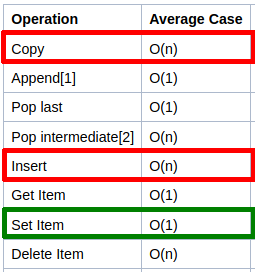

## <font color=green> &#9998; Exercices
1. <font color=green> Sur la première ligne du tableau (encadrée en rouge), on lit que la complexité de la copie d'une liste de Python est $O(n)$. Compléter la ligne ci-dessous pour en rappeler la signification :</font>

Cela signifie qu'il faut environ deux fois plus de temps pour copier une liste ..............................................................................
C'est à dire que le temps de copie augmente .................. avec la ................. de la liste.

2. <font color=green>Sur l'avant dernière ligne du tableau on lit que changer une valeur de la liste est en O(1). Expliquer ce que cela signifie.</font>

### Vérification expérimentale
On souhaite vérifier expérimentalement, que le temps d'insertion d'un élément a bien une complexité en $O(n)$ comme indiqué sur la 5e ligne du tableau (encadré en rouge). On utilise donc le module *timeit* de Python afin de mesurer pour diverses tailles de listes, le temps d'insertion d'un élément en **première position** dans la liste.

## <font color=green> &#9998; Exercices</font>
3. <font color=green>Quelle instruction permet d'insérer un élément <code>elt</code> à la première position d'une liste <code>liste</code> ?</font>

In [ ]:
# Votre réponse ici (taper l'instruction sans l'exécuter)


4. <font color=green> On donne le code ci-dessous qui permet de mesurer les temps d'insertion en première position pour diverses tailles de listes. Expliquer ce que contient la liste dans laquelle on effectue les insertions.  </font>

In [13]:
from random import randint
import timeit

# La liste des tailles, et l'opération qu'on effectue sur la liste
tailles=[1000,5000,10000,20000,30000,40000,50000]
operation = "liste[-1]=0"
temps_insert=[]

# Mesure des temps nécessaires à l'opération pour les tailles données
for n in tailles:
    liste = [randint(1,100) for _ in range(n)]
    temps=timeit.timeit(operation,globals=globals(),number=10000)
    temps_insert.append(temps)

5. <font color=green> Le code suivant permet de tracer l'évolution du temps d'insertion en fonction de la taille de la liste. Quelle est l'allure prévu du graphique ? Pourquoi ? Exécuter le code fourni pour confirmer</font>

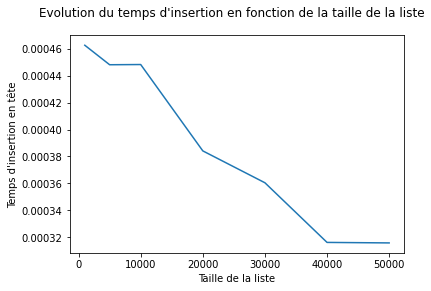

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("Taille de la liste")
plt.ylabel("Temps d'insertion en tête")
plt.suptitle("Evolution du temps d'insertion en fonction de la taille de la liste")
plt.plot(tailles, temps_insert)

6. <font color="green">Reprendre le code ci-dessus, le modifier de façon à tester l'opération de modification d'un élément de la liste (on pourra par exemple changer la valeur de l'élément d'indice 0). Quelle est la complexité de cette opération ?</font>

In [ ]:
# Votre réponse ici


### Bilan 
Nous venons donc de voir que pour une liste de Python :
* Le temps d'insertion d'un élément en tête de liste a une complexité en O(n) (nous l'avons vérifié expérimentalement)
* Le temps d'accès à un élément est lui par contre en O(1), c'est à dire **indépendant de la taille de la liste**.

### Explications
Pour comprendre il faut analyser la phrase suivante :
*Internally, a list is represented as an array; the largest costs come from growing beyond the current allocation size (because everything must move), or from inserting or deleting somewhere near the beginning (because everything after that must move).*
En clair, les listes de Python sont représenter en mémoire de façon <font color=red>contigue</font> c'est à dire par des cases mémoires qui se suivent, par conséquent:
* insérer un élément en début de tableau demande donc à décaler tout le tableau. 
* accéder à un élément peut se faire directement, **sans parcourir** ceux qui le précèdent.

Prenons un exemple pour illustrer, on dispose d'une liste Python  qui contient les éléments Y,T,H,O,N. En voici la représentation :
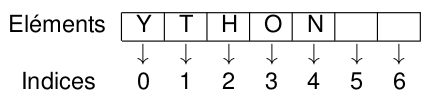
Les éléments sont contigues en mémoire, si on veut insérer un élément en première position il faut donc décaler tous les autres, ainsi tous les éléments du tableau doivent changer d'indice :

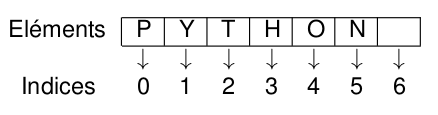
Observer bien comment le O par exemple qui était à l'indice 3 a du être décalé à l'indice 4. Tous les éléments devant être décalés, on comprend bien que le temps nécessaire augmente avec la taille de la liste.  
Cette représentation  explique aussi qu'une insertion en fin de tableau (opération *append* dans le tableau ci-dessus) a une complexité en O(1) puisqu'aucun déplacement des autres éléments de la liste n'est alors nécessaire.

L'accès à un élément se fait par contre en temps constant, en clair le temps d'accès à un élément **ne dépend pas** de la taille de la liste (l'explication de ce phénomène fait intervenir les notions de pointeurs et d'adresse mémoire et dépasse le cadre de ce cours).

## <font color="darkblue"> &diams; Structure de données </font>

Les listes de Python sont ce qu'on appelle une <font color="red">structure de données</font>, c'est à dire une façon d'organiser et de gérer les données pour pouvoir y accéder et les traiter plus facilement. Les méthodes permettant de manipuler la structure de données s'appellent <font color="red">l'interface</font>. Une même interface peut donner lieu a plusieurs <font color="red">implémentation</font>, en effet l'utilisateur n'a besoin que de l'interface pour accéder à la structure de données, la représentation interne des données et des méthodes c'est à dire l'implémentation ne lui est pas forcément connu.

Prenons un exemple pour comprendre cette distinction fondamentale entre **interface** et **implémentation**. Dans une cuisine, les tables de cuisson disposent toutes de la même interface des boutons permettant : d'allumer, d'éteindre, de forcer ou de baisser la puissance. Mais elles n'ont pas toutes la même implémentation, il peut s'agir de gazinière, de plaques chauffantes, de plaques à induction, ....

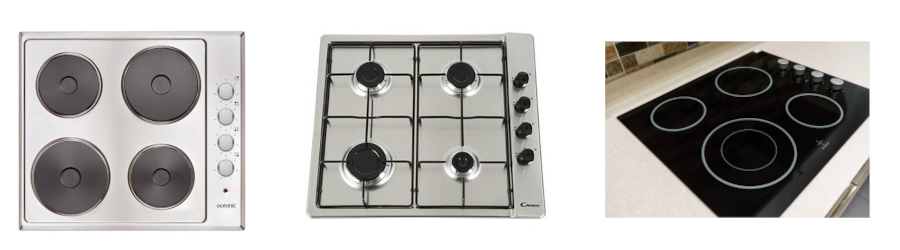

Notez les similitudes avec une structure de données, nous pouvons l'utiliser via son **interface** par exemple y ajouter ou retirer des éléménts sans pour autant connaître les détails de son **implémentation** (la façon dont la structure est définie ou représentée en mémoire). De la même façon que pour les tables de cuisson, une structure de données peut avoir plusieurs implémentations différentes (et la même interface).



## <font color="darkblue"> &diams; Les piles </font>

Nous allons définir une structure de données la <font color="red">pile</font> dont l'aspect sémantique (c'est à dire le sens) est très similaire à celui des piles que l'on rencontre dans la vie de tous les jours. Prenons l'exemple d'une pile d'assiette :

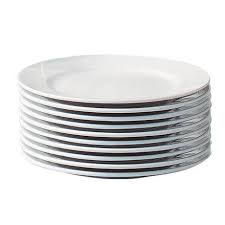

Pour manipuler cette pile on supposera qu'on ne peut accéder qu'à l'élément situé sur le dessus (le sommet de la pile), c'est ce qu'on appelle la **sémantique** de la structure (son sens), en effet on comprend bien qu'accéder à une assiette située dans la pile est une opération plus délicate. De même on supposera qu'on ne peut ajouter une assiette que sur le sommet de la pile (là encore au niveau sémantique, insérer une assiette dans la pile serait une opération d'une autre nature). Remarquons que dépiler n'est possible que si la pile n'est pas vide.
L'interface d'une pile se résume donc aux opérations suivantes :
* **dépiler** : retirer l'élément situé au sommet de la pile
* **empiler** : ajouter un élément au sommet de la pile
* **est_vide** : qui indique si oui ou non la pile est vide

Plusieurs implémentations de cette structure de données sont possibles, nous choisissons ici d'utiliser la programmation objet et de représenter une pile par une liste de Python :

In [35]:
# Une implémentation de pile en Python

class Pile:
    
    # On représente en interne une pile par une liste
    def __init__(self):
        self.contenu = []
    
    def empiler(self,element):
        self.contenu.append(element)
        
    def est_vide(self):
        return self.contenu==[]
    
    def depiler(self):
        assert not self.est_vide(), "Pile vide"
        return self.contenu.pop()
    
    def sommet(self):
        assert not self.est_vide(), "Pile vide"
        return self.contenu[-1]
    
    def __str__(self):
        debut = '|'
        fin  = '>'
        milieu=''
        for elt in self.contenu:
            milieu = milieu + str(elt) + ','
        milieu = milieu[0:-1]
        return debut+milieu+fin

A titre d'exemple, créeons une pile dans laquelle on empile les lettres de Python :

In [28]:
mot = "PYTHON"
ma_pile = Pile()
for lettre in mot :
    ma_pile.empiler(lettre)

Maintenons dépilons les éléments de cette pile  et affichons les 

In [29]:
while not ma_pile.est_vide():
    print(ma_pile.depiler())

N
O
H
T
Y
P


Remarquons que la dernière lettre a être entrée dans la pile est celle qui sort en premier, on dit qu'une pile est une structure **LIFO** (**L**ast **I**n **F**irst **O**ut). 

Nous voyons aussi qu'une pile est une structure de donnée **adaptée** au problème qui consiste à écrire un mot donné en entrée à l'envers, ce problème est en effet résolu de façon très simple en empilant puis dépilant les lettres du mot. Il faut donc retenir qu'une structure de donnée **adaptée** permet parfois d'apporter une solution simple à un problème. On peut citer à ce sujet Linus Tordvalds : 

>"*I will, in fact, claim that the difference between a bad programmer and a good one is whether he considers his code or his data structures more important. Bad programmers worry about the code. Good programmers worry about data structures and their relationships"*

Lorsqu'on écrit une implémentation, l'usage est d'indiquer le coût des opérations, ici empiler est réalisé à l'aide d'un `append` (cout en O(1)) comme indiqué dans le tableau du début) et dépiler à l'aide d'un `pop` du dernier élément et donc aussi en O(1).

En dépit de leur simplicité, les piles sont des structures données très utilisées en informatique, nous en verrons des exemples d'application en exercice. Mais rappellons déjà que lors du chapitre sur la récursivité, nous avons parlé de la **pile** d'appel. En effet, les appels successifs à une fonction récursive sont stockés dans une pile, que l'on dépile une fois la condition d'arrêt atteinte.


## <font color=green> &#9998; Exercices</font>  

<font color=green>Pour ces exercices, on utilisera l'interface de la classe Pile définie ci-dessus.  </font>  
7. <font color=green> Créer la pile constituée par l'empilement des nombres suivants : 1, 3, 5, 7, 11, ... 99 </font>  
8. <font color=green> Ajouter dans l'interface de la pile une méthode <code>sommet</code> qui renvoie le sommet de la pile mais sans l'enlever de la pile (on lit simplement la valeur du sommet de la pile sans modifier la pile) </font>  
9. <font color=green> Ajouter dans l'interface de la pile une méthode <code>__str__</code> permettant d'afficher le contenu de la pile. On pourra séparer les éléments par des virgules et indiquer par le caractère <code>|</code> la base de la pile et par <code>></code> son sommet. Par exemple après avoir empiler les lettres de PYTHON, l'affichage produit : <code> |P,Y,T,H,O,N></code> </font>  
10. <font color=green> Une autre implémentation possible de la pile consiste à fixer une taille maximale à la pile. On ne peut plus empiler lorsque cette taille est atteinte. Ecrire cette nouvelle implémentation en vous inspirant de celle donnée plus haut</font>

In [36]:
# Question 7
pnombres = Pile()
for k in range(1,100,2):
    pnombres.empiler(k)
print(pnombres)

|1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99>


In [38]:
pchaines = Pile()
pchaines.empiler("Toto")
pchaines.empiler("Titi")
pchaines.depiler()
print(pchaines)

|Toto>


## <font color="darkblue"> &diams; Les files </font>
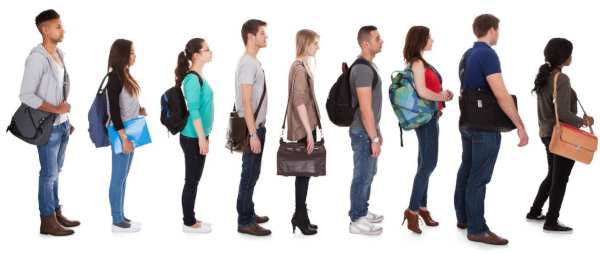

Dans une file d'attente, le premier entré dans la file est aussi le premier qui en sort, c'est donc une structure **FIFO** (**F**irst **I**n **F**irst **O**ut).
Comme pour la pile, définissons l'interface de cette structure de données, on doit pouvoir :
* **Enfiler** un élément c'est à dire ajouter un élément à la file
* **Défiler** un élément c'est à dire retirer un élément de la file
* L'opération précédente n'est possible que si la file n'est pas vide, on doit donc pouvoir **tester si une file est vide ou non**

## <font color=green> &#9998; Exercices</font>  

11. <font color="green"> En vous inspirant de ce qui a été fait plus haut pour les piles, écrire une implémentation Python d'une file en utilisant la POO et en représentant une file par une liste de Python.</font>

In [5]:
# Une implémentation de file
class File:
    
    # On représente en interne une pile par une liste
    def __init__(self):
        self.contenu = []
    
    def enfiler(self,element):
        self.contenu.insert(0,element)
        
    def est_vide(self):
        return self.contenu==[]
    
    def defiler(self):
        assert not self.est_vide(), "File vide"
        return self.contenu.pop()
    
    def __str__(self):
        debut = '>'
        fin  = '>'
        milieu=''
        for elt in self.contenu:
            milieu = milieu + str(elt) + ','
        milieu = milieu[0:-1]
        return debut+milieu+fin


In [8]:
ma_file = File()
ma_file.enfiler(1)
ma_file.enfiler(2)
print(ma_file)
ma_file.defiler()
print(ma_file)

>2,1>
>2>


12. <font color="green"> Consulter <a href="https://wiki.python.org/moin/TimeComplexity" target=_blank>cette page</a> ou le tableau donné ci-dessous pour déterminer la complexité des opérations enfiler et défiler de votre implémentation </font>

13. <font color="green"> Ecrire une méthode spéciale permettant un affichage de l'objet File (séparer les éléments de la file par des virgules et utiliser les symboles de votre choix pour le début et la fin de la file) </font>

Comme pour les piles, les files sont très utilisées en informatique, pensez par exemple à la file d'attente d'une imprimante. Nous verrons d'autres exemples d'application en exercice.

## <font color="darkblue"> &diams; Les listes chainées </font>

Nous avons vu ci-dessus qu'insérer un élément en tête dans une liste de Python a une complexité en O(n) et que cela est dû à son implémentation sous forme de tableaux. On présente ici une structure de données, la **liste chainée** pour laquelle cette opération est en O(1). Considérons une liste chainée contenant les lettres Y, T, H, O et N. On peut la représenter ainsi :

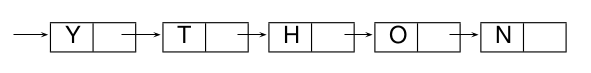

C'est à dire que dans une liste chainée chaque élément est un "maillon" constitué par une valeur et un lien vers le maillon suivant (ce lien est représenté par une flèche sur le schéma). 

Supposons que nous voulions insérer un nouvel élément (la lettre P) en tête de la liste, 3 étapes sont nécessaires : 
1. Créer un nouveau maillon contenant la valeur 'P'

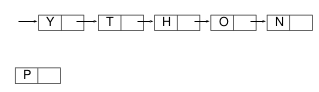

2. Indiquer que le suivant de ce maillon est la tête de notre liste
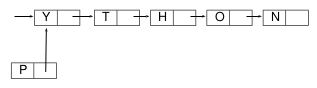

3. Indiquer que la tête de la liste est maintenant notre nouveau maillon
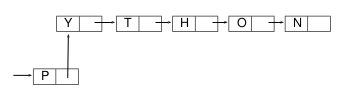

Observer bien que contrairement aux listes de Python, ici l'insertion se fait **sans déplacer** les autres éléments de la liste.

On propose ci-dessous une implémentation de cette structure de données qui utilise deux classes :
* la classe **maillon** avec la valeur contenu dans le maillon et le lien vers le maillon suivant
* la classe **liste** définie simplement comme un lien vers un maillon

In [15]:
class Maillon:
    '''Le maillon d'une liste chainée représenté par sa valeur et un lien vers le maillon suivant'''
    def __init__(self,valeur):
        self.valeur = valeur
        self.suivant = None
        
class Liste:
    '''Une liste est un lien vers son premier maillon'''
    
    # Création d'une liste vide
    def __init__(self):
        self.tete = None
    
    # Test si la liste chainée est vide
    def est_vide(self):
        return self.tete==None
        
    # Ajout d'un élément en tête de la liste (on retrouve les 3 étapes schématisés ci-dessus)
    def ajoute(self,valeur):
        nouveau_maillon = Maillon(valeur)
        nouveau_maillon.suivant = self.tete
        self.tete = nouveau_maillon
    
    # Suppression d'un élément en tête de liste
    def supprime(self):
        assert not self.est_vide(),"Liste vide, suppression impossible"
        self.tete = self.tete.suivant
    
    def __getitem__(self,indice):
        maillon = self.tete
        while indice>0:
            assert maillon.suivant != None, "Index en dehors de  la liste"
            maillon=maillon.suivant
            indice = indice - 1
        return maillon.valeur
    
    # Un affichage "sympa" de notre implémentation des listes chainées
    def __repr__(self):
        if self.tete==None:
            return '<>'
        sortie = '<'
        elt = self.tete
        while elt!=None:
            sortie=sortie+elt.valeur+","
            elt=elt.suivant
        sortie=sortie[:-1]+'>'
        return sortie

On peut utiliser cette implémentation pour créer la liste contenant les lettres Y, T, H, O et N schématisé ci-dessus :

In [19]:
ma_liste=Liste()
ma_liste.ajoute('N')
ma_liste.ajoute('O')
ma_liste.ajoute('H')
ma_liste.ajoute('T')
ma_liste.ajoute('Y')
print(ma_liste[0])

Y


On affiche la liste pour vérifier que tout s'est bien passé :

In [4]:
print(ma_liste)

<Y,T,H,O,N>


## <font color=green> &#9998; Exercices</font>  

14. <font color="green"> Ajouter la lettre 'C' à <code>ma_liste</code>, afficher le résultat. </font>
15. <font color="green"> Supprimer la lettre 'C' de <code>ma_liste</code>.</font>
16. <font color="green"> Ajouter la lettre 'P' à <code>ma_liste</code></font>

In [ ]:
# Vos réponses ici


### Complexité de l'insertion

Comme nous l'avons fait pour les listes de Python, nous allons maintenant mesurer le temps d'insertion d'un élément en tête d'une liste chainée :

In [5]:
from random import randint
import timeit

# La liste des tailles, et l'opération qu'on effectue sur la liste
tailles=[100,200,300,1000,2000]
operation = "ma_liste.ajoute(0)"
temps_insert=[]

# Mesure des temps nécessaires à l'opération pour les tailles données
for n in tailles:
    ma_liste = Liste()
    for _ in range(n):
        ma_liste.ajoute(randint(1,100))
    temps=timeit.timeit(operation,globals=globals(),number=10000)
    temps_insert.append(temps)

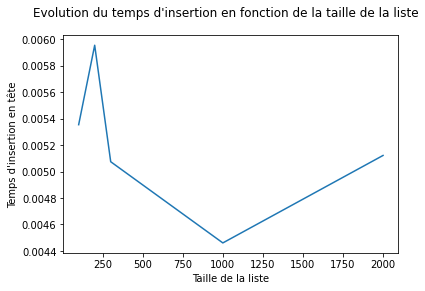

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("Taille de la liste")
plt.ylabel("Temps d'insertion en tête")
plt.suptitle("Evolution du temps d'insertion en fonction de la taille de la liste")
plt.plot(tailles, temps_insert)

## <font color=green> &#9998; Exercices</font>  

14. <font color="green"> Observer le graphique produit, comparer avec celui qui figure au début de ce Notebook pour les listes Python, que peut-on en dire ? </font>

Votre réponse ici


Nous verrons en exercice que le module `deque` de Python propose une implémentation des listes chainées.